## Initialization Notebook

#### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'numpy'

In [5]:
class Task:
    def __init__(self, x, y):
        self.name = "Task"
        self.x = x
        self.y = y
        self.reward = np.random.randint(0, 100)

    def __str__(self):
        return f"Task at ({self.x}, {self.y})"

    def __repr__(self):
        return f"Task at ({self.x}, {self.y}) with reward {self.reward}"
    
    def __eq__(self, other):
        return self.x == other.x and self.y == other.y
    
# Robot class with random position and speed initialization
class Robot:
    def __init__(self, grid_size):
        # Random x, y position within grid boundaries
        self.x = np.random.randint(0, grid_size[0])
        self.y = np.random.randint(0, grid_size[1])
        # Random speed between 0.5 and 1.0
        self.speed = np.random.uniform(0.5, 1.0)

    def __repr__(self):
        return f"Robot at ({self.x}, {self.y}) with speed {self.speed:.2f}"

In [20]:
def init_robots(num_robots, grid_size):
    robots = [Robot(grid_size) for _ in range(num_robots)]
    return robots

def init_tasks(num_tasks, grid_size):
    tasks = [Task(
        np.random.randint(0, grid_size[0]),  # random x position
        np.random.randint(0, grid_size[1]))  # random y position
        for _ in range(num_tasks)]
    return tasks

def get_rewards(tasks):
    return [task.reward for task in tasks]

def visualize(robots, tasks, grid_size):
    # TASKS VIS
    reward_grid = np.zeros(grid_size)
    for task in tasks:
        reward_grid[task.x, task.y] = task.reward

    mask = reward_grid == 0

    # Plot the heatmap for tasks with rewards
    plt.figure(figsize=(10, 8))
    sns.heatmap(reward_grid, mask=mask, annot=True, fmt=".0f", cmap="coolwarm", 
                linewidths=0.5, square=True, cbar_kws={"label": "Reward"}, 
                annot_kws={"color": "black"})
    
    # ROBOT VIS
    for robot in robots:
        plt.scatter(robot.y + 0.5, robot.x + 0.5, color='lime', s=200, marker='X', edgecolors='black', label="Robot")

    # To avoid clutter, ensure we only add the legend once
    handles, labels = plt.gca().get_legend_handles_labels()
    if len(handles) == 0:
        plt.legend(["Robot"], loc='upper right')

    plt.title("Task Rewards Heatmap with Robot Positions")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.show()

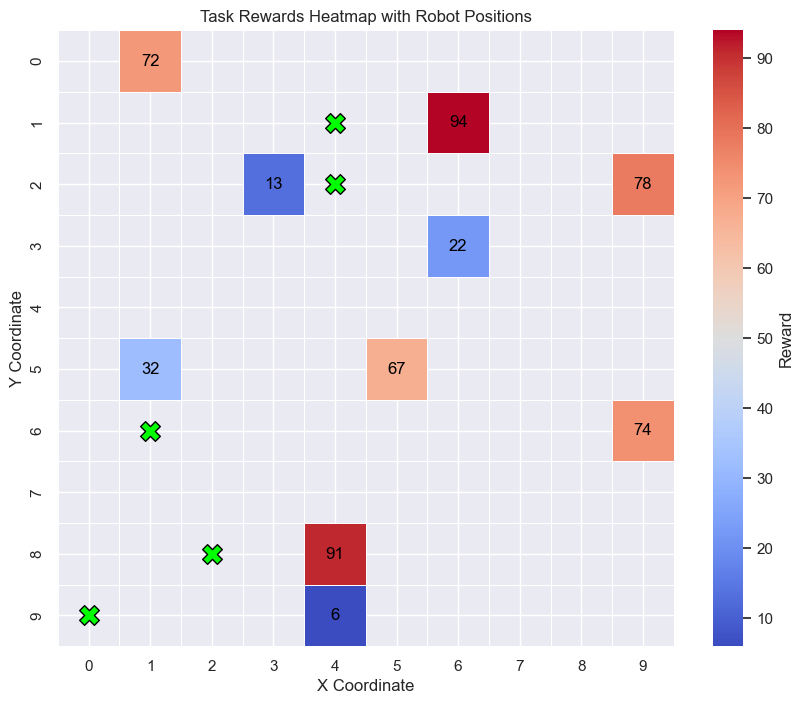

In [22]:
def main():
    grid_size = (10, 10)
    num_robots = 5
    num_tasks = 10

    robots = init_robots(num_robots, grid_size)
    tasks = init_tasks(num_tasks, grid_size)
    visualize(robots, tasks, grid_size)

if __name__ == "__main__":
    main()

In [ ]:
def create_robot_task_matrix(robots, tasks):
    r = len(robots)
    t = len(tasks)
    
    # Initialize the r x t x 2 matrix
    matrix = np.zeros((r, t, 2))
    
    for i, robot in enumerate(robots):
        for j, task in enumerate(tasks):
            # Calculate Euclidean distance
            distance = np.sqrt((robot.x - task.x)**2 + (robot.y - task.y)**2)
            
            # Populate the matrix with (speed, distance)
            matrix[i, j] = [robot.speed, distance]
    
    return matrix

robots = init_robots(5, (10, 10))
tasks = init_tasks(30, (10, 10))
# Example usage:
robot_task_matrix = create_robot_task_matrix(robots, tasks)
print(robot_task_matrix.shape)  # Should print (5, 30, 2) for 5 robots and 30 tasks
print(robot_task_matrix[0, 0])  # Example output for first robot and first task